# 2017 California Mortgage Application Dataset Analysis
### Team: Eliza Chute, Arush Khanna, Vineeth Raghunath
[Link to original mortgage dataset](https://www.consumerfinance.gov/data-research/hmda/explore)

In [0]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib as mpl      
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
#import data and enter auth code
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## Import Data and Initial Analysis of Data Frame Object

In this section, we are importing the dataset and surveying it at a high level

In [3]:
mortgage_raw = pd.read_csv('/content/drive/My Drive/Data Bootcamp Project/ca_2017_mortgage.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Overview of raw mortgage dataset

In [4]:
mortgage_raw.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,69.610001,NaN,4344.0,93.599998,903.0,1316.0,324.0,97400.0,82.0,California,...,Female,NaN,NaN,NaN,NaN,Black or African American,"Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
1,75.089996,NaN,3944.0,52.000000,485.0,708.0,325.0,63200.0,97.0,California,...,Male,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,141.740005,NaN,3372.0,33.189999,592.0,1105.0,1079.0,97400.0,278.0,California,...,"Information not provided by applicant in mail,...",NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Consumer Financial Protection Bureau,CFPB,Loan originated
3,87.050003,NaN,6087.0,69.970001,1080.0,1752.0,312.0,63200.0,67.0,California,...,Female,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
4,126.690002,NaN,5356.0,23.100000,1711.0,2102.0,372.0,75200.0,84.0,California,...,Female,NaN,NaN,NaN,NaN,American Indian or Alaska Native,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated


In [5]:
#Dimensions of Mortgage Dataframe
mortgage_raw.shape

(595371, 47)

**Our data has 595,371 entries and 47 variables**

In [6]:
mortgage_raw.dtypes

tract_to_msamd_income             float64
rate_spread                       float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                  float64
hud_median_family_income          float64
applicant_income_000s             float64
state_name                         object
state_abbr                         object
sequence_number                   float64
respondent_id                      object
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
edit_status_name                  float64
denial_reason_name_3              

**From the output above, we see that our dataframe consists of either floats (for numerical data like income) or objects for the character/string data. With respect to the latter, this indicates we may have to convert or coerce the object variables to strings or categorical types if we are to perform operations on those variables.**

In [7]:
#view values of columns in data frame
for i in mortgage_raw.columns:
  print("{}: {}\n".format(i, mortgage_raw[i].unique()))

tract_to_msamd_income: [ 69.61000061  75.08999634 141.74000549 ...  39.27000046  30.10000038
  46.84000015]

rate_spread: [  nan  1.58  2.15  1.53  1.7   2.09  1.74  2.67  2.21  2.14  2.24  1.75
  1.56  1.82  1.78  1.86  1.98  1.99  3.53  1.65  1.61  2.19  1.55  1.64
  1.57  1.77  1.76  1.79  1.83  1.85  1.51  1.97  2.37  1.54  2.2   1.94
  1.81  1.8   1.93  2.16  1.95  2.03  2.18  2.38  1.62  1.88  1.63  2.35
  2.33  2.01  4.32  3.14  2.25  1.87  2.76  1.52  1.84  2.    1.69  1.91
  1.5   2.5   8.45  2.13  1.96  2.41  1.6   2.06  3.86  2.22  2.64  1.71
  2.87  1.59  2.49  2.23  1.66  1.89  2.29  1.68  2.12  1.72  2.32  4.59
  4.96  2.26  6.49  2.05  1.73  3.76  3.46  2.54  3.98  1.92  6.39  2.83
  2.11  5.14  2.07  2.1   2.04  2.69  3.8   2.36  3.12  4.35  2.31  5.17
  2.17  1.9   2.27  2.02  2.34  2.94  6.6   5.57  8.49  4.52  5.51  3.45
  2.57  2.42  4.1   2.77  2.62  3.24  2.78  4.84  2.81  8.28  3.9   3.5
  2.39  1.67  5.71  3.31  2.28  2.3   2.68  4.47  2.08  2.59  6.9   4.49
  3

**From the output above, we see that many of the variables are discrete and pull from a limited set of options. For example, lien_status_name only has three values: 'Secured by a first lien', 'Secured by a subordinate lien', 'Not applicable'. Additionally, we see that respondent id is our unique key in the data frame (i.e. single entry for every record)**

In [8]:
#Count and % of NAs per columns
count_of_values = mortgage_raw.count()
count_of_na = mortgage_raw.isnull().sum()

perc_na = (count_of_na / (count_of_values + count_of_na))*100

print("Count of NAs per Columns:")
print(count_of_na)
print()
print("Perc of NAs per Columns:")
print(perc_na)

Count of NAs per Columns:
tract_to_msamd_income               1659
rate_spread                       567237
population                          1659
minority_population                 1659
number_of_owner_occupied_units      1659
number_of_1_to_4_family_units       1659
loan_amount_000s                      78
hud_median_family_income            1659
applicant_income_000s              64284
state_name                             0
state_abbr                             0
sequence_number                   595371
respondent_id                          0
purchaser_type_name                    0
property_type_name                     0
preapproval_name                       0
owner_occupancy_name                   0
msamd_name                         15000
loan_type_name                         0
loan_purpose_name                      0
lien_status_name                       0
hoepa_status_name                      0
edit_status_name                  595371
denial_reason_name_3           

**From the output above, we see that the % of NaNs in the dataset are relatively low except in those columns that are an extension of an original attritubte (such as applicant race name 2 through 5).**

## Slicing and Analyzing the Data

In this section, we look at more in-depth queries and visualizations of the data concerning applicant income, loan size, race, location and gender

In [0]:
#grab copy of dataframe
mortgage_analysis = mortgage_raw

### Bar plots of categorical variable response frequencies

<Figure size 2160x360 with 0 Axes>

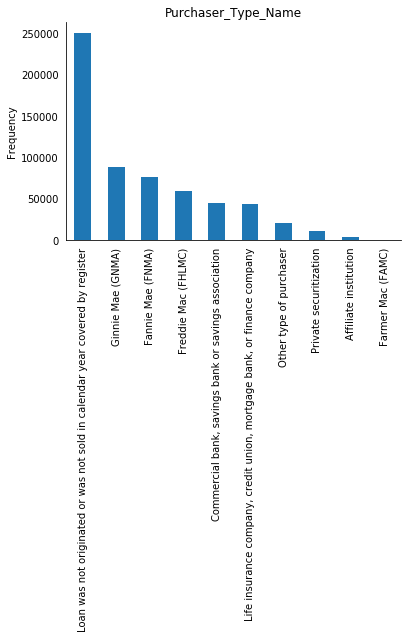

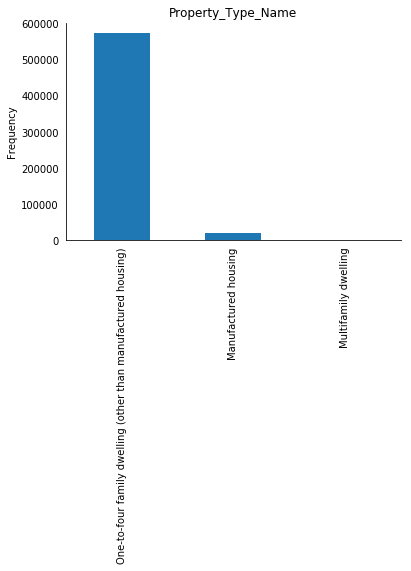

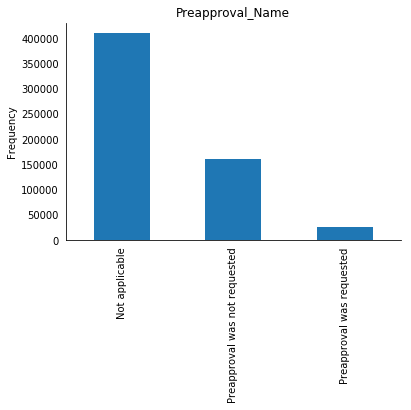

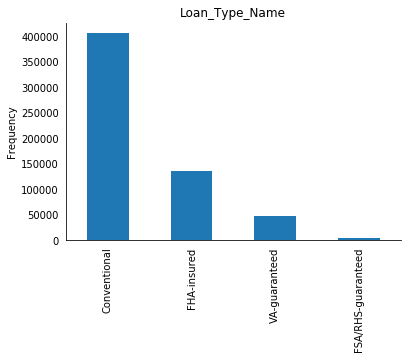

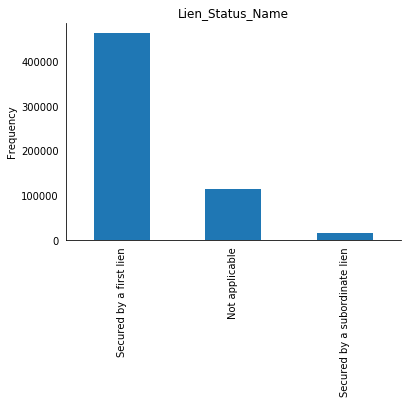

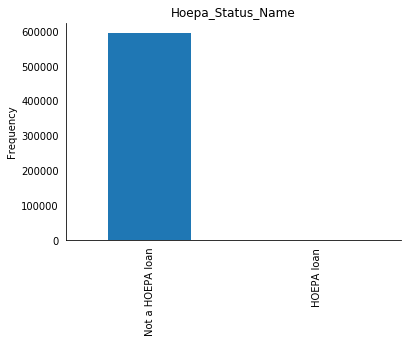

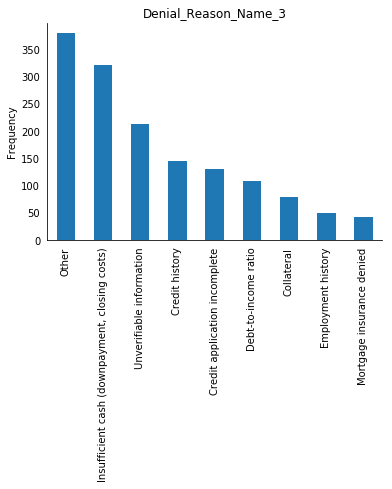

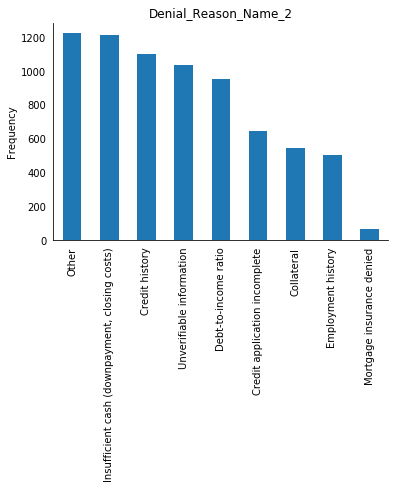

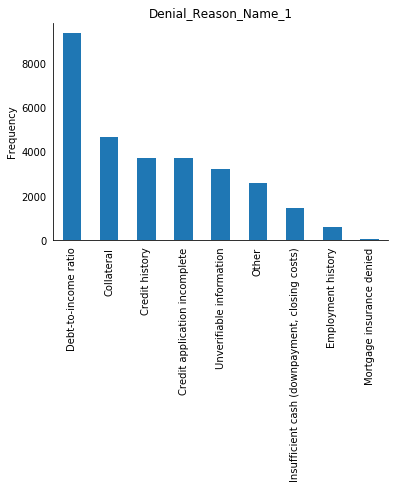

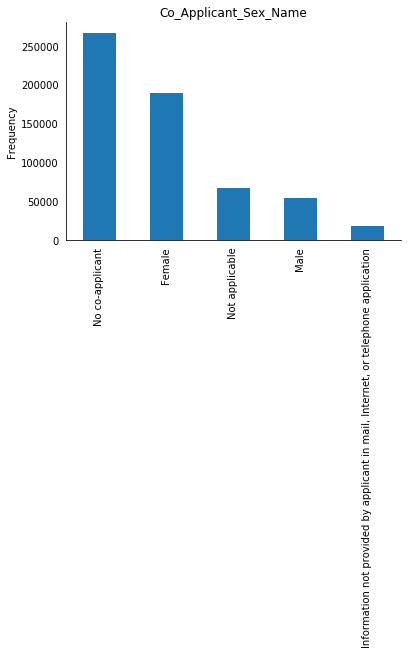

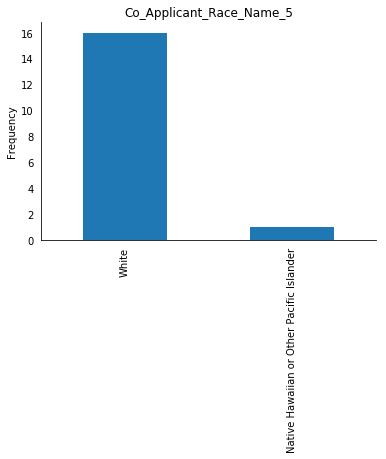

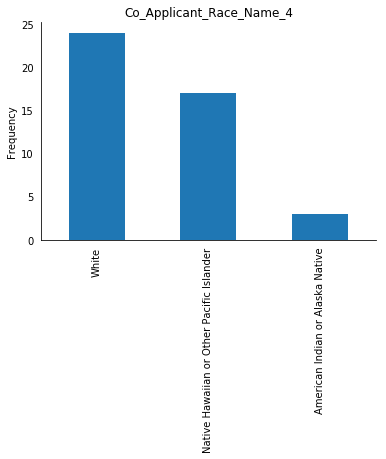

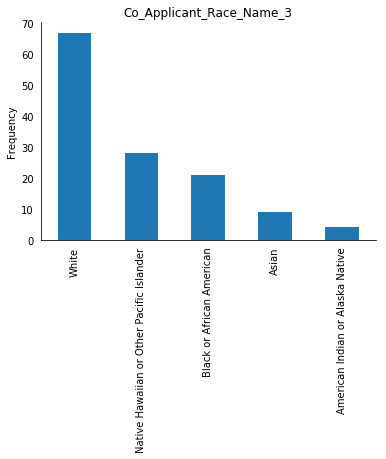

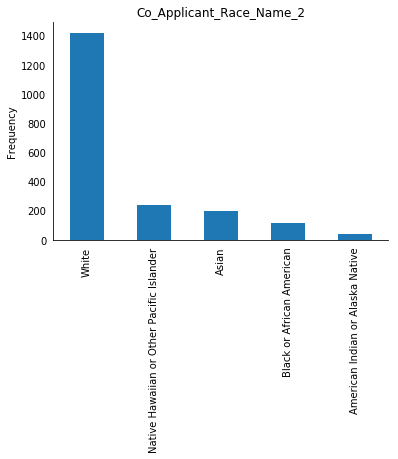

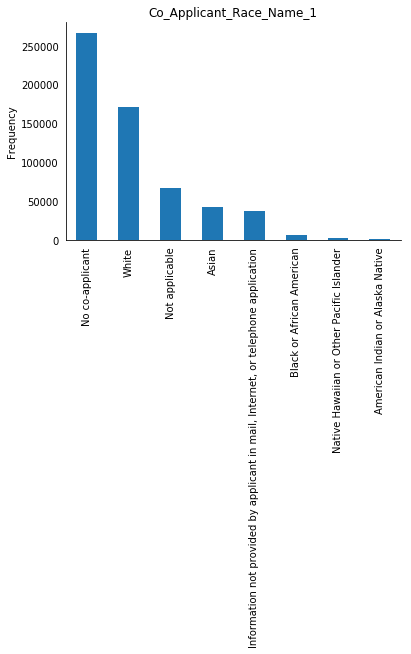

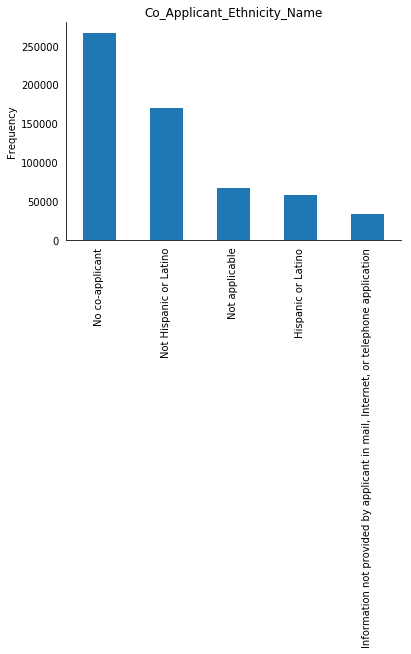

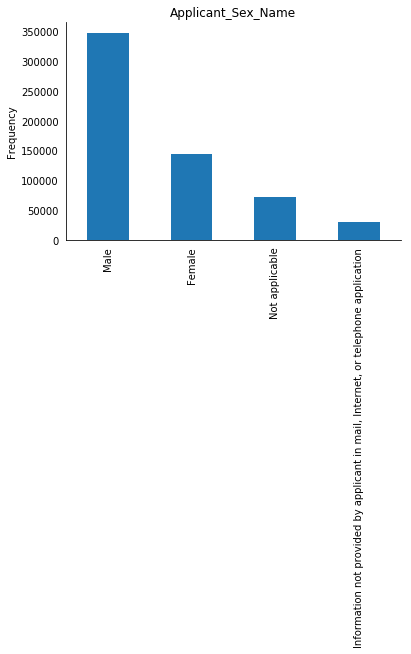

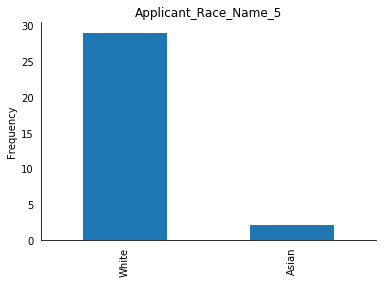

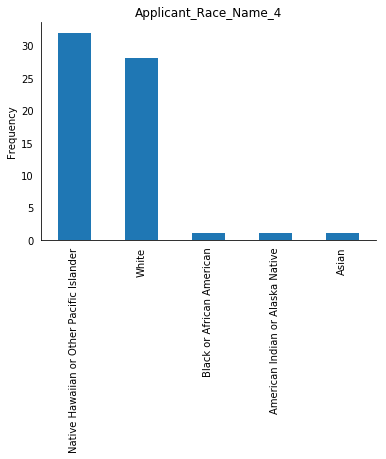

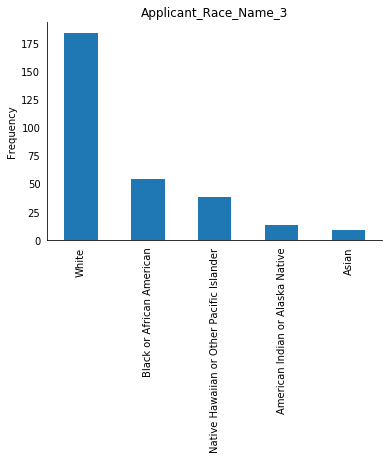

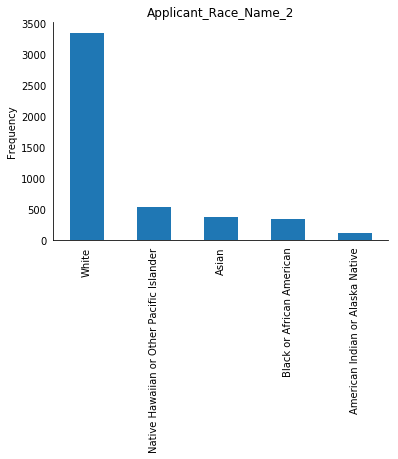

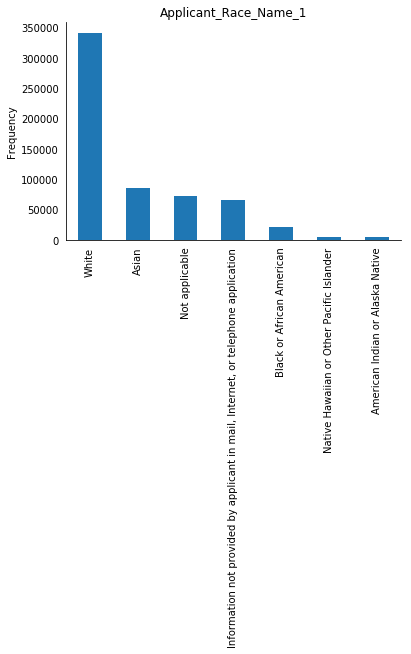

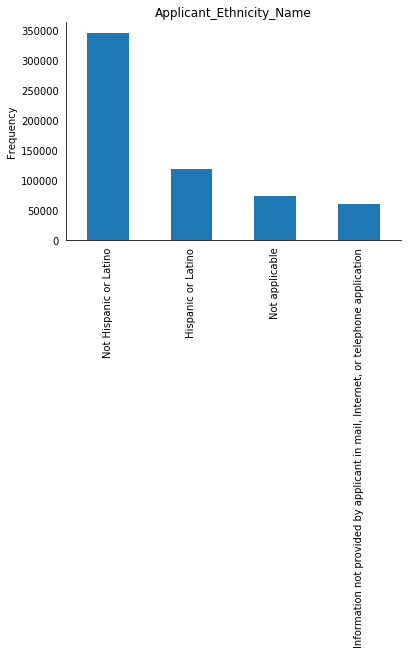

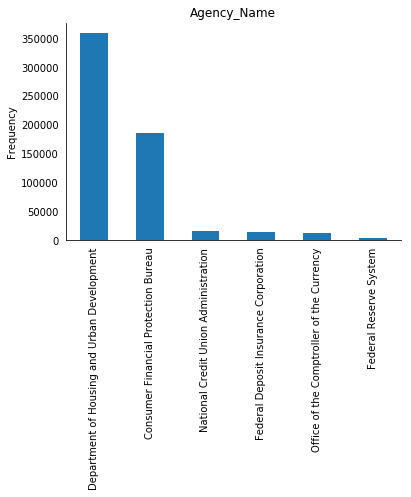

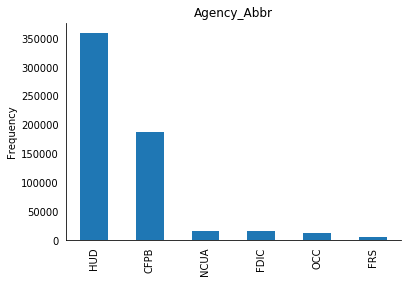

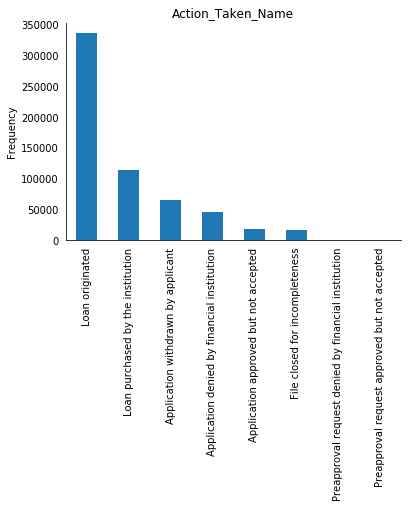

In [10]:
#histogram of categorical responses
categorical = mortgage_analysis.select_dtypes(include=['object']).dtypes.index.get_values()
categorical = np.array(categorical).tolist()
exclude = ['sequence_number','edit_status_name','application_date_indicator','respondent_id','state_name','state_abbr','as_of_year','loan_purpose_name','owner_occupancy_name','msamd_name','county_name']
categorical = [i for i in categorical if i not in exclude]

plt.figure(figsize=[30,5])

for i in categorical:
  fig, ax = plt.subplots()
  ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
  ax.set_ylabel('Frequency')
  ax.set_title(i.strip('_').title())
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  #ax.spines['left'].set_visible(False)
  #ax.spines['bottom'].set_visible(False)
  mortgage_analysis[i].value_counts().plot.bar(ax=ax)
  plt.show()
  print()
  print()

**From the frequency/bar plots above, we see a few interesting trends across the different variables:**

* **Vast majority of the loans are for one-to-four family dwellings**
* **Most loans are of a conventional type**
* **Most common denial_reason_1: high debt-to-income ratio**
* **Most common denial_reason_2 (aside from "other"): lack of sufficient cash (downpayments, closing costs, etc.)**
* **Majority of loan apps do not have a co-applicant**
* **Most loan applicants are male**
* **Most loan applicants are white**
* **The vast majority of loans in the dataset were approved**



### Histogram plots of numerical data

<Figure size 2160x360 with 0 Axes>

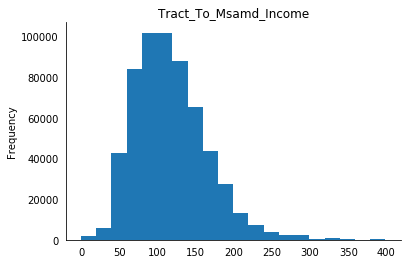

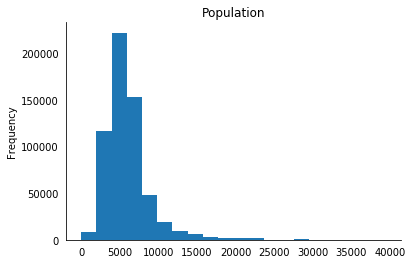

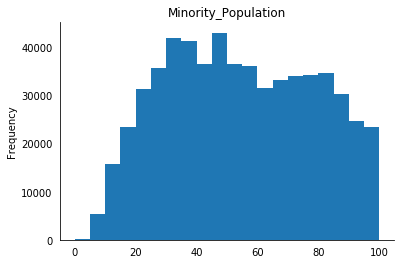

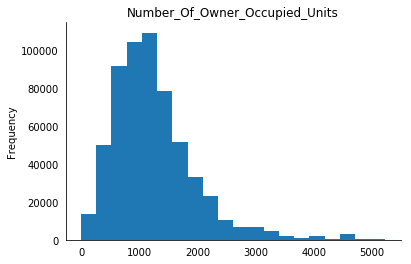

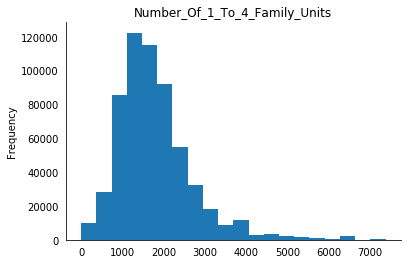

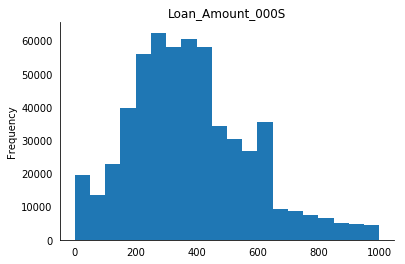

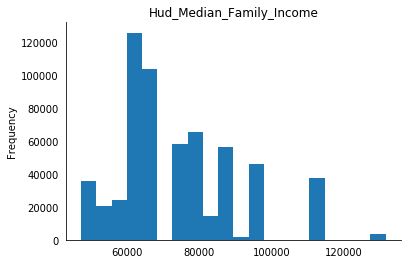

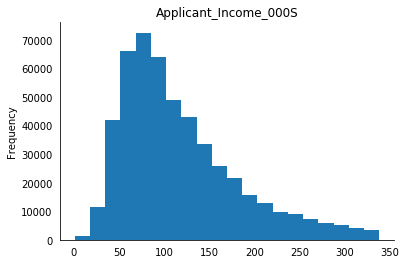

In [11]:
numerical = mortgage_analysis.select_dtypes(include=['float64']).dtypes.index.get_values()
numerical = np.array(numerical).tolist()
exclude = ['rate_spread','sequence_number','edit_status_name','application_date_indicator','census_tract_number']
numerical = [i for i in numerical if i not in exclude]

plt.figure(figsize=[30,5])

for i in numerical:
  fig, ax = plt.subplots()
  ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
  ax.set_ylabel('Frequency')
  ax.set_title(i.strip('_').title())
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  
  
  #Outlier data values in loan amounts and applicant income are skewing the histogram - removing top 5% data to adjust for this
  if i in ['loan_amount_000s', 'applicant_income_000s']:
    temp = mortgage_analysis.loc[mortgage_analysis[i] < mortgage_analysis[i].quantile(q=.95),i]
    temp.plot.hist(bins = 20, ax=ax) 
  else:
    mortgage_analysis[i].plot.hist(bins=20, ax=ax)
    
  plt.show()
  print()
  print()


**From the histogram plots of the numerical variables above, we see a few interesting trends:**


* **Population size is concentrated around 2500 to 7500**
* **The minority population appears to be fairly uniform in frequency across all minority population sizes**
* **The vast majority of loan amounts are concentrated between 200K and 400K**
* **Applicant income is concentrated around 50K to 100K**

### Analyzing denial reasons by mean annual income and mean loan amount

In [12]:
#mean loan amount and applicant income by denial reason
mortgage_analysis.loc[mortgage_analysis['denial_reason_name_1'].notnull(),['denial_reason_name_1','loan_amount_000s','applicant_income_000s']].groupby(
    'denial_reason_name_1', as_index=False).agg({'loan_amount_000s':np.mean, 'applicant_income_000s':np.mean})

,denial_reason_name_1,loan_amount_000s,applicant_income_000s
0,Collateral,477.490554,161.592328
1,Credit application incomplete,487.791701,209.627238
2,Credit history,428.012841,151.280282
3,Debt-to-income ratio,560.599212,123.805957
4,Employment history,403.001675,139.354561
5,"Insufficient cash (downpayment, closing costs)",576.586324,181.033449
6,Mortgage insurance denied,457.461538,120.256410
7,Other,476.184028,174.934902
8,Unverifiable information,489.922551,155.913113


In [13]:
#mean loan amount and applicant income for loans that were not denied
mortgage_analysis.loc[mortgage_analysis['denial_reason_name_1'].isnull(),['loan_amount_000s','applicant_income_000s']].agg({'loan_amount_000s':np.mean, 'applicant_income_000s':np.mean})

loan_amount_000s         440.723885
applicant_income_000s    145.257932
dtype: float64

**Compared to the baseline of loans that were accepted (cell above), we observed a couple of findings in the means of loan amounts and applicant incomes for those loans that were denied.**

**First, we see that for loans that were denied based on the debt-to-income ratio or insufficient cash, the loan amount is significantly higher than for loans that either were accepted or loans that were denied. Likewise, we also see that for the "debt-to-income ratio denied" loans, the applicant income is among the lowest of all the denial reasons.**

**Second, we see that for those loans where the loan was denied based on employment history, the average loan amount is below the mean loan values for all other reasons. This could be an indication that those with a limited employment history have had fewer years to save and are therefore applying for smaller loans.**

### Denial reasons grouped by race

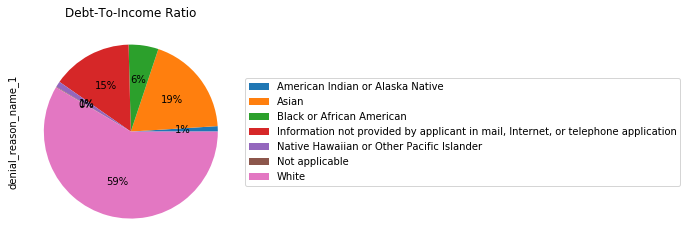

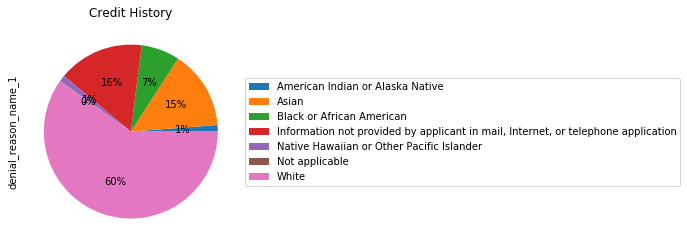

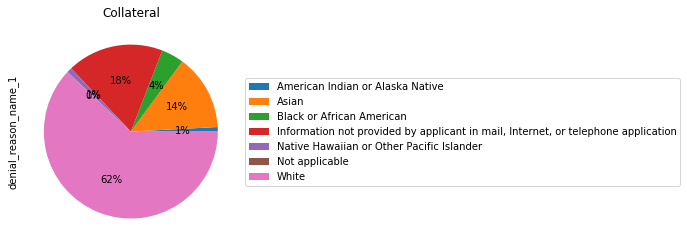

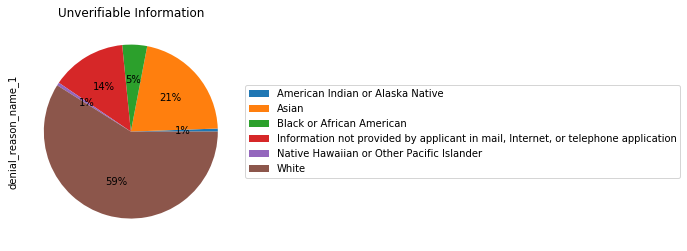

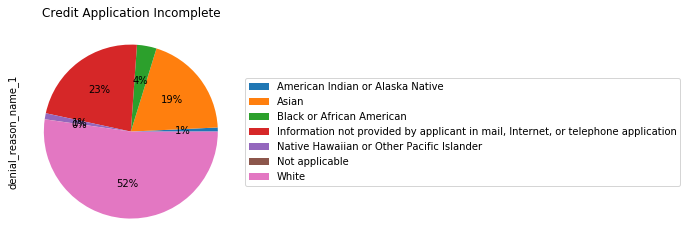

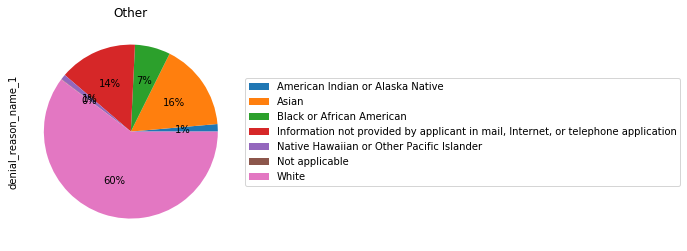

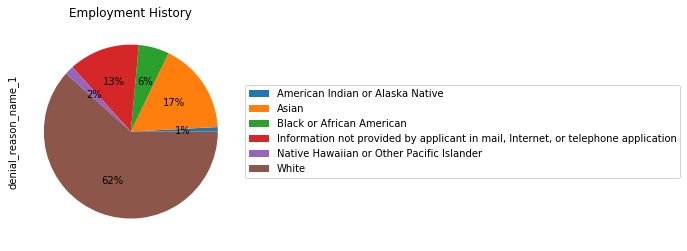

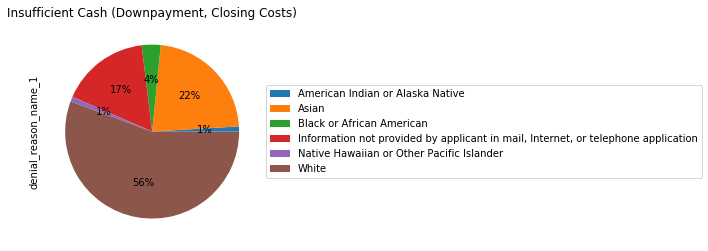

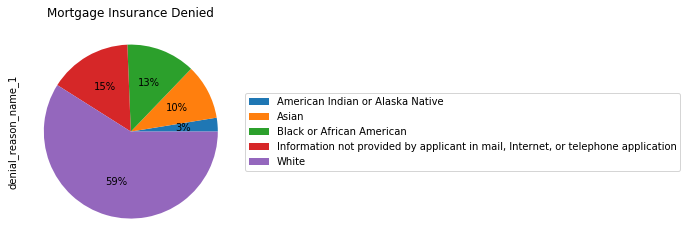

In [14]:
#analyzing denial reasons and race %s per reason
for i in mortgage_analysis['denial_reason_name_1'].dropna().unique():
  fig, ax = plt.subplots()
  ax.set_title(i.strip('_').title())
  ax.set_ylabel("")
  ax.set_xlabel("")
  temp_df = mortgage_analysis.loc[mortgage_analysis['denial_reason_name_1'] == i,['denial_reason_name_1','applicant_race_name_1']].groupby('applicant_race_name_1', as_index = False).count()
  temp_df.plot.pie(y='denial_reason_name_1',ax=ax, autopct='%1.0f%%', legend=False, labels=None)
  plt.legend(temp_df['applicant_race_name_1'],loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.show()

**Looking at the pie charts above, we see that for all denial reasons, the race "white" is the most frequent label in the data. "White" generally represents 60% of the data for the majority of denial reasons with the exception of credit application incomplete. For credit application incomplete, we see that "information not provided" has a much larger percentage as compared its usual share in the other denial reasons. This may make sense as the credit application being incomplete is likely correlated with additional information (like race) missing from the loan application more generally.**

### Loan action grouped by gender

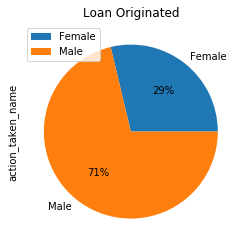

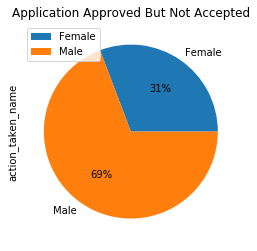

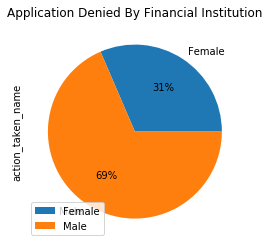

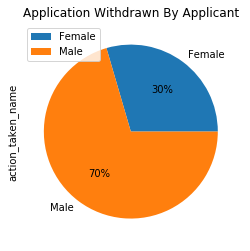

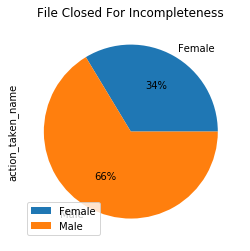

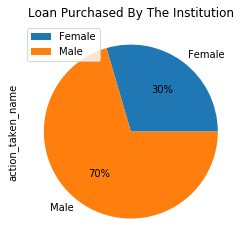

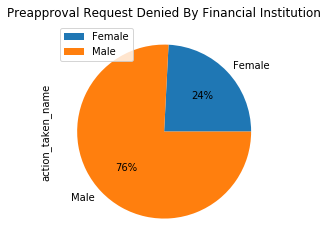

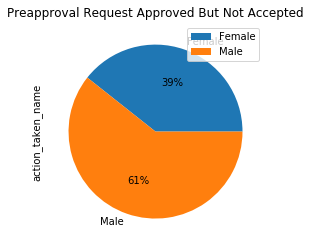

In [15]:
#group data by action taken and pie charts of male/female %
gender = ['Male', 'Female']

temp_df = mortgage_analysis.loc[mortgage_analysis['applicant_sex_name'].isin(gender),['action_taken_name', 'applicant_sex_name']]

for i in mortgage_analysis['action_taken_name'].unique():
  fig, ax = plt.subplots()
  ax.set_title(i.strip('_').title())
  temp_df.loc[temp_df['action_taken_name'] == i,:].groupby('applicant_sex_name').count().plot.pie(y='action_taken_name', ax=ax, autopct='%1.0f%%')
  plt.show()

**From the pie charts above we see that, across all denial reasons, men tend to be the majority gender represented. We also observe that generally the split between male and female across all the denial reasons appears to be a 70/30 split. Two outliers in this pattern are for the preapproval request denied by financial institution and preapproval request approved but not accepted. In the case of the former, we see that males are overrepresented (76/24 split male vs. female) and, in the case of the latter, females are overrepresented (61/39 split male vs. female).**

### Loan approval rates by county

In [16]:
#create new column with loan originated binary label
mortgage_analysis['loan_originated']= np.where(mortgage_analysis['action_taken_name'].str.contains('Loan originated'),1,0)
mortgage_analysis.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name,loan_originated
0,69.610001,NaN,4344.0,93.599998,903.0,1316.0,324.0,97400.0,82.0,California,...,NaN,NaN,NaN,NaN,Black or African American,"Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated,1
1,75.089996,NaN,3944.0,52.000000,485.0,708.0,325.0,63200.0,97.0,California,...,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,1
2,141.740005,NaN,3372.0,33.189999,592.0,1105.0,1079.0,97400.0,278.0,California,...,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Consumer Financial Protection Bureau,CFPB,Loan originated,1
3,87.050003,NaN,6087.0,69.970001,1080.0,1752.0,312.0,63200.0,67.0,California,...,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,1
4,126.690002,NaN,5356.0,23.100000,1711.0,2102.0,372.0,75200.0,84.0,California,...,NaN,NaN,NaN,NaN,American Indian or Alaska Native,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated,1


In [17]:
#calculate % of loans approved by county and save as new dataframe
county_df = mortgage_analysis.groupby('county_name').agg({'loan_originated':np.mean})
county_df['loan_originated'] = county_df['loan_originated'] * 100
county_df.sort_values('loan_originated', ascending=False).head()

,loan_originated
county_name,
San Mateo County,69.140951
San Francisco County,66.420051
Humboldt County,65.283320
Alpine County,64.285714
Marin County,63.191063


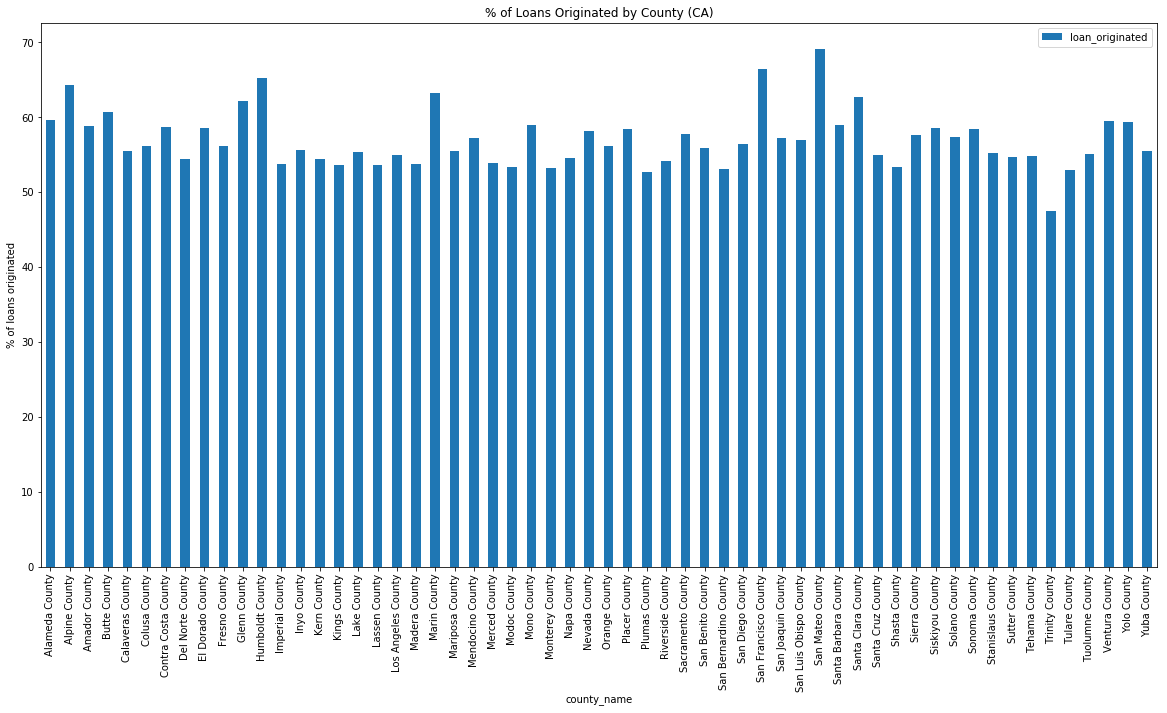

In [18]:
#Sort county data by loan origination %
fig, ax = plt.subplots()
ax.set_xlabel('county name')
ax.set_ylabel('% of loans originated')
ax.set_title('% of Loans Originated by County (CA)')
county_df.plot.bar(figsize=(20,10), ax=ax)

**From the graph above, we see that Santa Barbara County has the highest percentage of loans originated while Tehama County has the lowest percentage of loans originated.**

### Average loan value and average income of loan applicant for those loans purchased by a specific loan purchaser type

In [19]:
#group data by loan purchaser
mortgage_analysis.groupby('purchaser_type_name', as_index=False).agg({'loan_amount_000s':np.mean,'applicant_income_000s':np.mean})

,purchaser_type_name,loan_amount_000s,applicant_income_000s
0,Affiliate institution,439.915182,135.766234
1,"Commercial bank, savings bank or savings assoc...",449.889886,138.922616
2,Fannie Mae (FNMA),365.998355,119.152213
3,Farmer Mac (FAMC),296.043478,67.777778
4,Freddie Mac (FHLMC),366.777721,117.764159
5,Ginnie Mae (GNMA),351.495440,98.026138
6,"Life insurance company, credit union, mortgage...",368.364795,137.895005
7,Loan was not originated or was not sold in cal...,545.665788,177.819117
8,Other type of purchaser,237.749964,97.389532
9,Private securitization,475.493085,145.719278


**From the data above, we see that Farmer Mac purchases mortgages with lower average loan values as compared to the other government backed loan purchaser types. Likewise we see that those loans that were not originated or ultimately purchased are often at a much higher avergage loan amount than those that are purchased. Finally, we see that the government backed loan organizations (i.e. Fannie, Freddie and Ginnie) generally hold loans with a lower average value as compared to private purchasers (e.g. affiliate institution, commercial bank).**

### Loan origination percentage by race

In [44]:
#group data by race and calculate average loan origination by race
mortgage_analysis.groupby('applicant_race_name_1', as_index=False).agg({'loan_originated':np.mean})

,applicant_race_name_1,loan_originated
0,American Indian or Alaska Native,0.619666
1,Asian,0.658685
2,Black or African American,0.601926
3,"Information not provided by applicant in mail,...",0.596416
4,Native Hawaiian or Other Pacific Islander,0.628244
5,Not applicable,0.005173
6,White,0.650126


**We generally see the percentages of loans approved hovering between 60-65%.**

### Loan value distribution by county

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


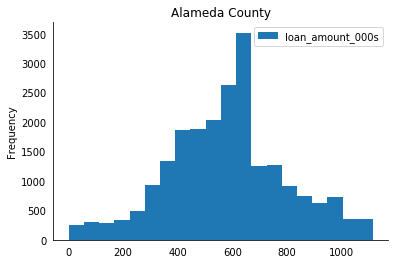

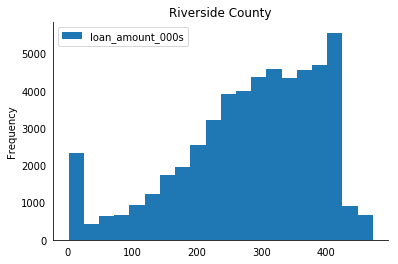

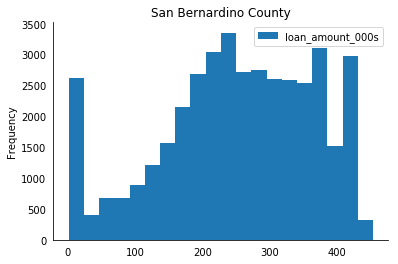

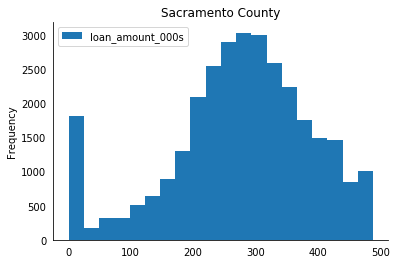

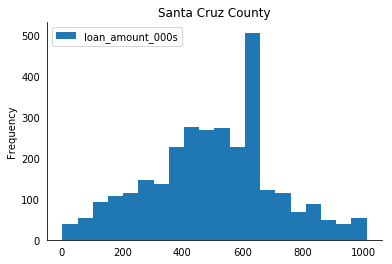

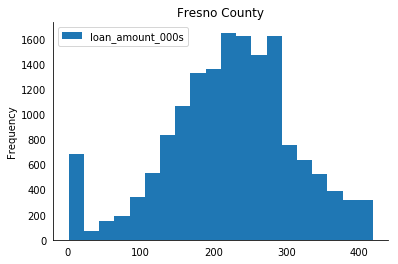

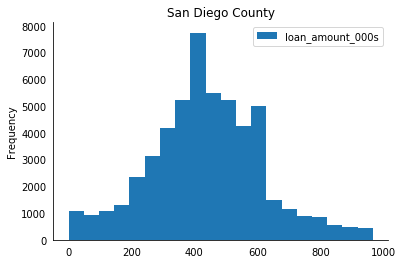

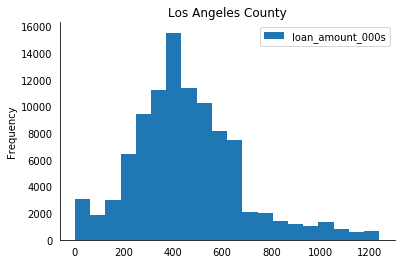

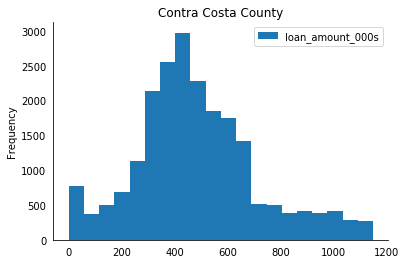

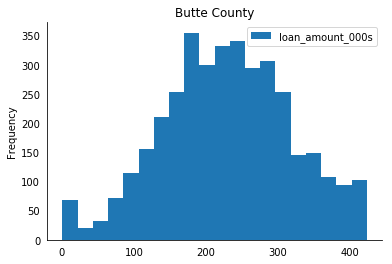

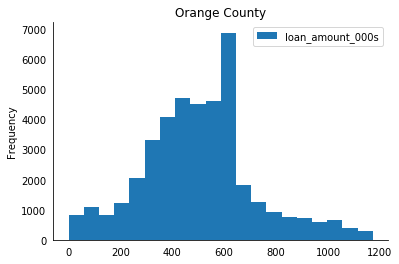

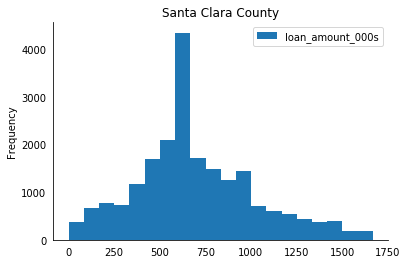

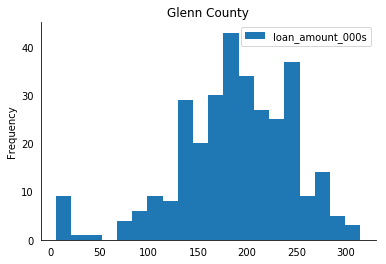

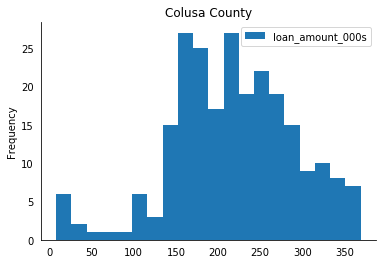

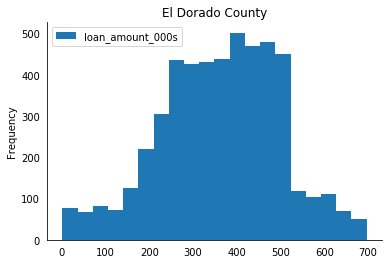

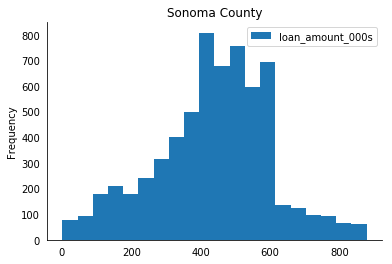

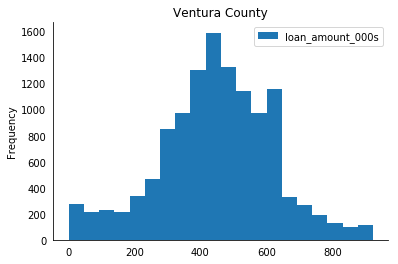

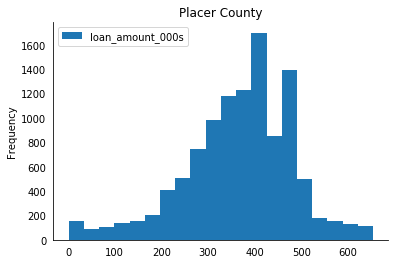

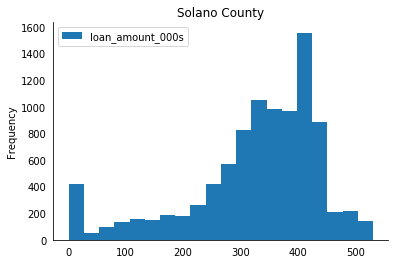

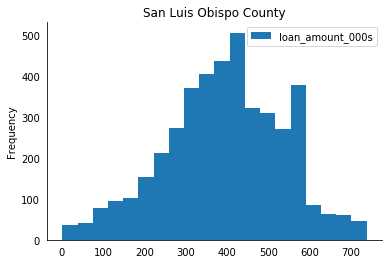

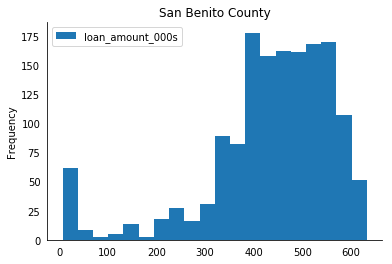

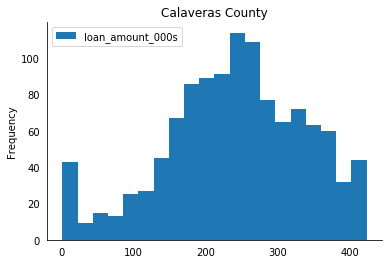

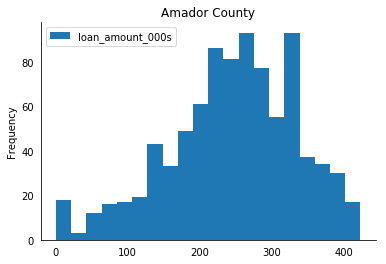

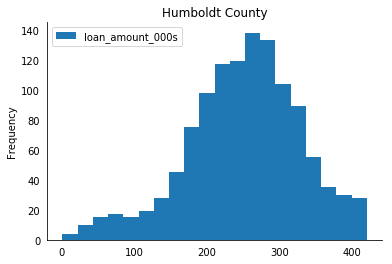

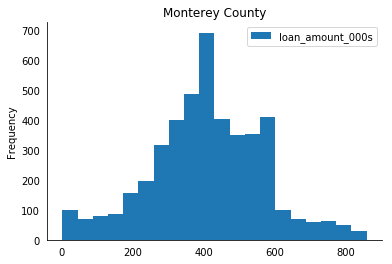

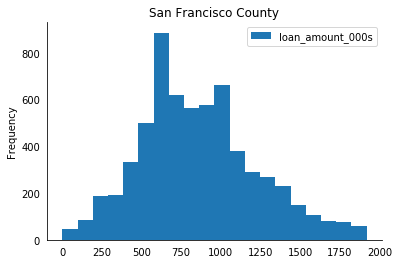

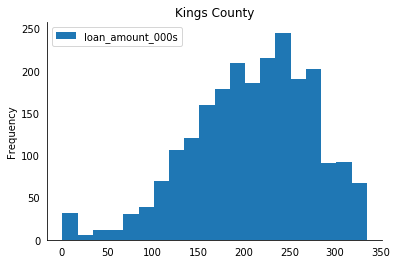

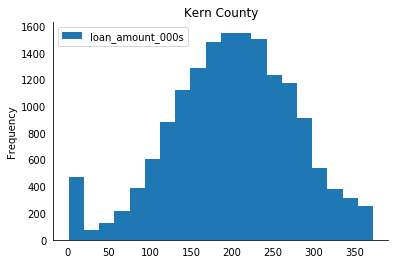

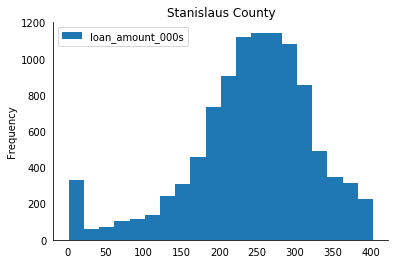

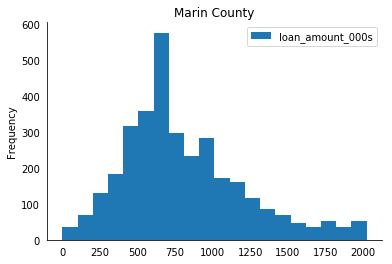

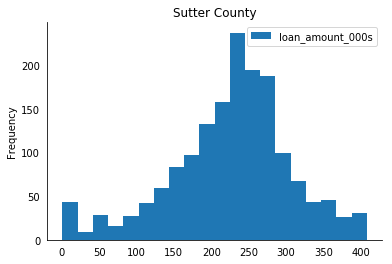

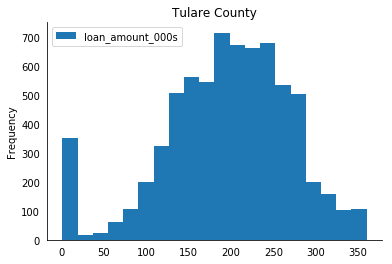

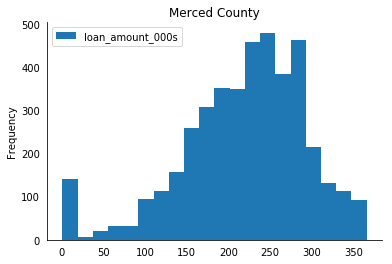

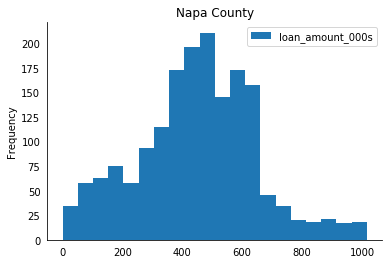

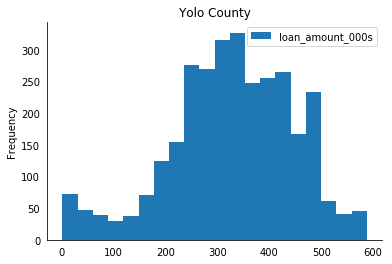

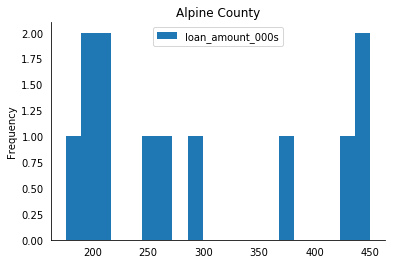

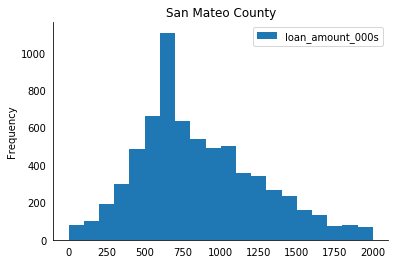

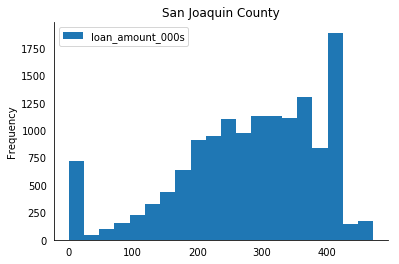

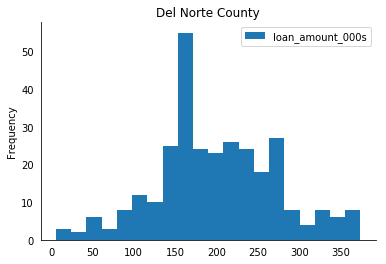

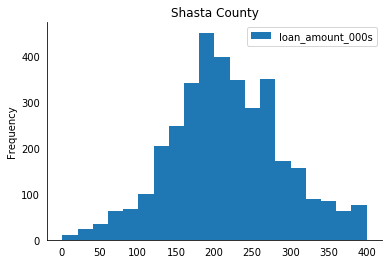

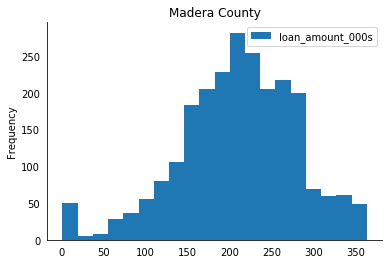

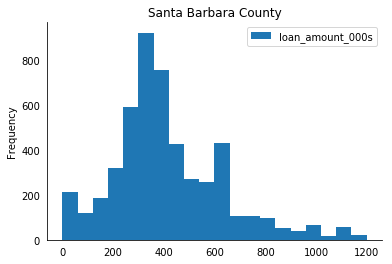

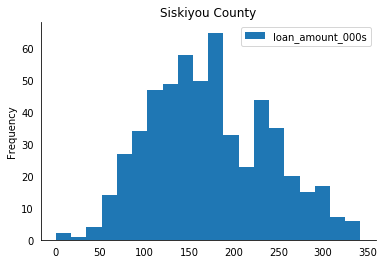

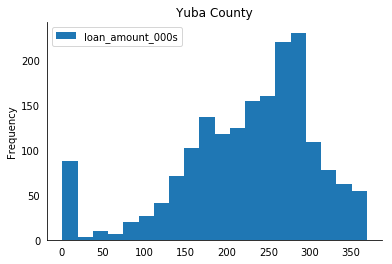

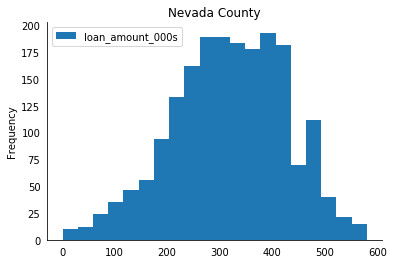

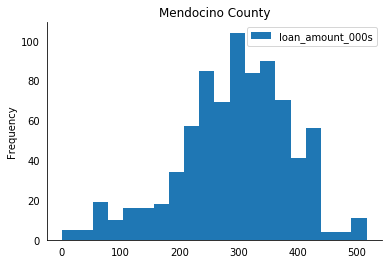

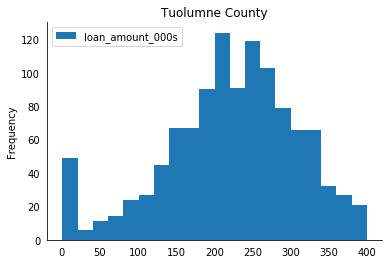

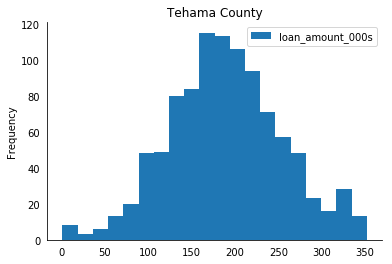

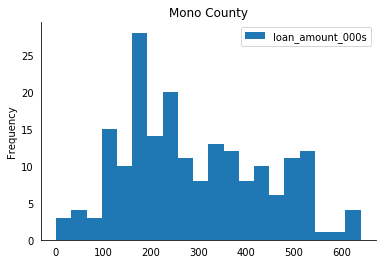

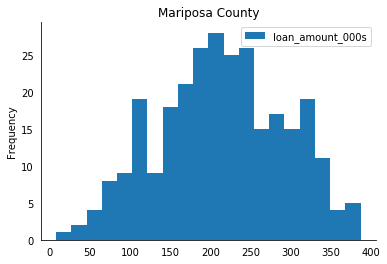

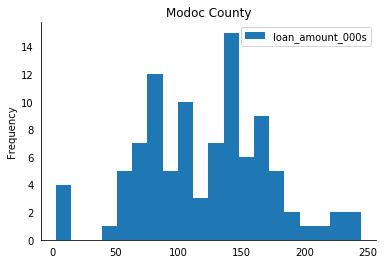

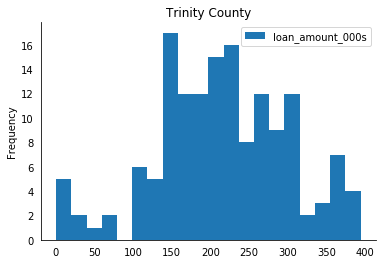

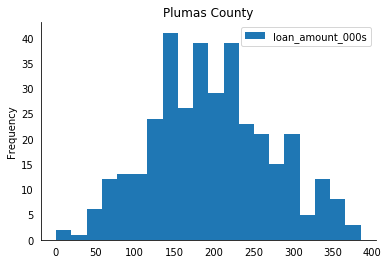

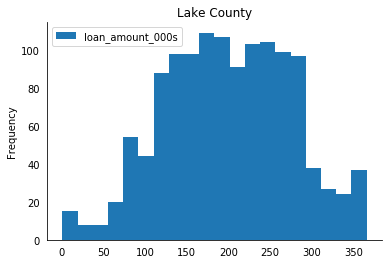

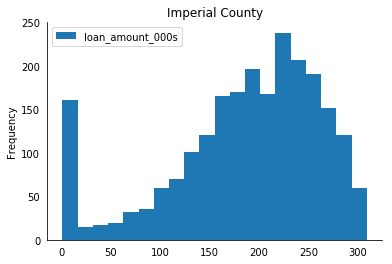

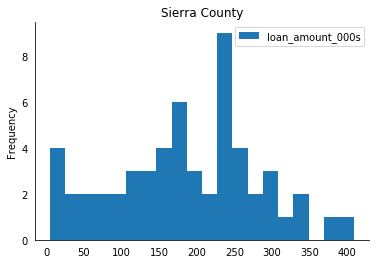

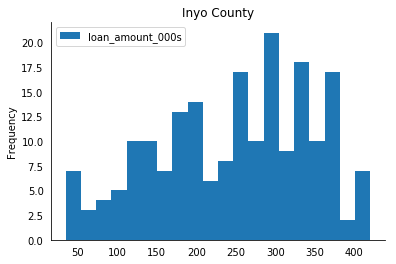

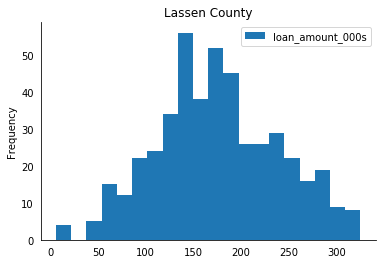

In [50]:
#loop through data selected by county and plot histogram of loan amount
for i in mortgage_analysis['county_name'].unique():
  
  if isinstance(i, str):
    temp_df = mortgage_analysis.loc[mortgage_analysis['county_name'] == i,['county_name','loan_amount_000s']]
    temp_df = temp_df.loc[temp_df['loan_amount_000s'] < temp_df['loan_amount_000s'].quantile(q=.95),:]
  
    fig, ax = plt.subplots()
  
    ax.tick_params(axis="both", which="both", bottom=False, top=False, labelbottom=True, left=False, right=False, labelleft=True)
    ax.set_ylabel('Frequency')
    ax.set_title(i.strip('_').title())
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
  
    temp_df.plot.hist(bins = 20, ax=ax) 

**From the graphs above, we unsurprisingly see that counties known for or adjacent to higher paying industries (e.g. tech) like San Mateo have a distribution of loan values that tends to skew significantly higher as compared to other counties in CA.**

## Predicting Loan Origination using Logistic Regression, Decision Tree, Random Forest, and MLP Classifiers from sklearn
In this section, we will attempt to predict whether or not a loan was originated using a logisitc regression, decision tree, random forest, and MLP classifier models. We are using these models instead of a linear regression as we are attempting to predict a categorical variable (i.e. was the loan originated) and not a continuous value. 



### Label encoding

Under this approach, we convert our string categorical values into numeric categorical values because our models cannot be trained using string values. For example, if we have a category "car" which can be "ford", "toyota" or "volkswagen", we would convert those string category values to 1,2 and 3.

In [0]:
#important cross training/split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#import decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

#import logisitc regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#import MLPclassifier 
from sklearn.neural_network import MLPClassifier

#import random forest model
from sklearn.ensemble import RandomForestClassifier

In [0]:
#grab copy of original dataset
predict_df = mortgage_raw

In [0]:
#drop columns with 100% NAs or single values
predict_df = predict_df.drop(columns=['sequence_number','edit_status_name','application_date_indicator','respondent_id','state_name','state_abbr','as_of_year','loan_purpose_name','owner_occupancy_name'])

**Dropping the columns with all NaNs or single values (e.g. state name) as they provide no predictive information. Also dropping respondent_id as it is the table key to identify unique instances/rows**

In [0]:
#drop denial reason columns
predict_df = predict_df.drop(columns=['denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3','purchaser_type_name'])

**Dropping the denial reason as it is post hoc information that indicates why a application was ultimately denied (i.e. what we are trying to predict). Same for purchaser type name (filled in based on who purchases the loan if/once it's originated)**

In [0]:
#drop rate spread
predict_df = predict_df.drop(columns=['rate_spread'])

**Dropping rate spread as the sparseness of data in rate spread causes the data to almost entirely drop when dropping NaN rows for model training purposes**

In [0]:
#convert categorical features into numerical categories
numerical_cols = predict_df.select_dtypes(include=['float64','int64']).dtypes.index.get_values()
categorical_cols = predict_df.select_dtypes(include=['object']).dtypes.index.get_values()
new_categorical_cols = []

for i in categorical_cols:
  predict_df[i] = predict_df[i].astype('category')
  new_col_name = i+"_cat"
  new_categorical_cols.append(new_col_name)
  predict_df[new_col_name] = predict_df[i].cat.codes

In [0]:
#drop rows where the numerical values are NaN
predict_df = predict_df.dropna(subset = np.array(numerical_cols))

In [27]:
#predict dataframe appended with new numeric categorical variables
predict_df.dtypes

tract_to_msamd_income               float64
population                          float64
minority_population                 float64
number_of_owner_occupied_units      float64
number_of_1_to_4_family_units       float64
loan_amount_000s                    float64
hud_median_family_income            float64
applicant_income_000s               float64
property_type_name                 category
preapproval_name                   category
msamd_name                         category
loan_type_name                     category
lien_status_name                   category
hoepa_status_name                  category
county_name                        category
co_applicant_sex_name              category
co_applicant_race_name_5           category
co_applicant_race_name_4           category
co_applicant_race_name_3           category
co_applicant_race_name_2           category
co_applicant_race_name_1           category
co_applicant_ethnicity_name        category
census_tract_number             

In [0]:
#create binary variable representing whether or not the loan was originated
predict_df['loan_originated']=np.where(predict_df['action_taken_name'].str.contains('Loan originated'),1,0)

In [0]:
#create set of predictor variables based on our previous conversion of string categorical variables to numeric categorical variables
feature_vector = new_categorical_cols + np.array(numerical_cols).tolist()
feature_vector.remove('action_taken_name_cat')
feature_vector.remove('loan_originated')

In [58]:
#correlation of the feature vector with the binary variable of loan origination
predict_df[feature_vector].corrwith(predict_df['loan_originated'])

property_type_name_cat             0.137324
preapproval_name_cat               0.126167
msamd_name_cat                     0.013844
loan_type_name_cat                 0.020591
lien_status_name_cat               0.378825
hoepa_status_name_cat             -0.006055
county_name_cat                    0.003737
co_applicant_sex_name_cat         -0.072185
co_applicant_race_name_5_cat       0.002196
co_applicant_race_name_4_cat       0.000734
co_applicant_race_name_3_cat       0.002135
co_applicant_race_name_2_cat       0.006517
co_applicant_race_name_1_cat      -0.000382
co_applicant_ethnicity_name_cat   -0.030322
applicant_sex_name_cat            -0.035060
applicant_race_name_5_cat         -0.000728
applicant_race_name_4_cat         -0.000530
applicant_race_name_3_cat          0.000024
applicant_race_name_2_cat          0.005270
applicant_race_name_1_cat          0.005543
applicant_ethnicity_name_cat      -0.032710
agency_name_cat                    0.089806
agency_abbr_cat                 

**The results above show that most of variables exhibit very little correlation (either positive or negative) with our loan originated binary dependent variable. The variable that exhibits the highest correlation is the lien status. This would make sense as securing a lien indicates that the loan holder would have the house as collateral in the event the home owner defaults on the mortgage. Having this security for the loan holder likely would increase the odds of the loan originating.**

In [59]:
#Train and evaluate predictive models
X_train, X_test, Y_train, Y_test = train_test_split(predict_df[feature_vector], predict_df['loan_originated'], train_size=0.60, random_state=42)
aucs = []

#Logisitic Regression
Logistic_Regression = LogisticRegression(C = 10)
Logistic_Regression.fit(X_train, Y_train)
probas = Logistic_Regression.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(Y_test, probas)
aucs.append({"Model" : "Logistic Regression", "AUC" : auc})

#Decision Tree
Decision_Tree = DecisionTreeClassifier(min_samples_leaf=50)
Decision_Tree.fit(X_train, Y_train)
auc = roc_auc_score(Y_test, Decision_Tree.predict_proba(X_test)[:,1])
aucs.append({"Model" : "Decision Tree", "AUC" : auc})

#Random Forest
Random_Forest = RandomForestClassifier(n_estimators=20)
Random_Forest.fit(X_train, Y_train)
auc = roc_auc_score(Y_test, Random_Forest.predict_proba(X_test)[:,1])
aucs.append({"Model" : "Random Forest", "AUC" : auc})

#MLPClassifier (Neural Network)
MLP_Classifier = MLPClassifier(hidden_layer_sizes=5)
MLP_Classifier.fit(X_train, Y_train)
probas = MLP_Classifier.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(Y_test, probas)
aucs.append({"Model" : "MLP", "AUC" : auc})

auc_df = pd.DataFrame(aucs)
auc_df

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,AUC,Model
0,0.537402,Logistic Regression
1,0.708358,Decision Tree
2,0.709623,Random Forest
3,0.499997,MLP


**From our AUC values (which calculates the area under the ROC curve for each model), we see that the random forest model appears to have the strongest predicting capabilities of all the models.**

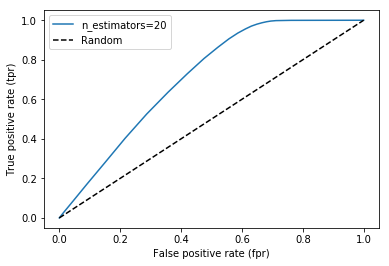

In [60]:
#ROC curve
n_estimators = 20
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, Y_train)

#get the probability of Y_test records being = 1
Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

#use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    

#plot the ROC curve
plt.plot(fpr, tpr, label="n_estimators=%s" % n_estimators)
    
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)
plt.show()

**From the ROC curve above, we see that our Random Forest is able to better discriminate between positives and negatives than if it we were to pick purely at random (the diagonal line). However, in an ideal model, our model's ROC curve would fit along the left and top borders of the graph - this would indicate a true positive rate of 1 and a false positive rate of 0 and an AUC of 1. As you can see in the graph above, our model does not fit quite that close to the edge and therefore is demonstrating an average AUC result of 0.7 (somewhere right in the middle between perfectly picking and randomly choosing).**

In [61]:
##run model on full data set
loan_predictions = model.predict(predict_df[feature_vector])
loan_temp = predict_df[feature_vector]
loan_predictions_set = loan_temp.assign(loan_actual = predict_df['loan_originated'], loan_predicted = loan_predictions)
loan_predictions_set['loan_incorrectly_predicted'] = abs(loan_predictions_set['loan_predicted'] - loan_predictions_set['loan_actual'])

perc_loans_incorrect_predict = loan_predictions_set['loan_incorrectly_predicted'].sum() / loan_predictions_set['loan_incorrectly_predicted'].count()

print("{:.2f}% of loans predicted correctly by the model".format((1-perc_loans_incorrect_predict)*100))

88.56% of loans predicted correctly by the model


**Running the full model on the test, we see that we are able to predict ~88% of the results correctly**

### One hot encoding

Under this approach, we convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This is prevent our models from incorrectly assuming that a category label with a value of 7 is sometimes 7 times more important/better than a category label of 1.

In [0]:
predict2_df = mortgage_raw

In [0]:
#drop columns with 100% NAs or single values
predict2_df = predict2_df.drop(columns=['sequence_number','edit_status_name','application_date_indicator','respondent_id','state_name','state_abbr','as_of_year','loan_purpose_name','owner_occupancy_name'])

#drop denial reason columns
predict2_df = predict2_df.drop(columns=['denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3','purchaser_type_name'])

#drop rate spread
predict2_df = predict2_df.drop(columns=['rate_spread'])

In [0]:
#convert categorical features into numerical categories
categorical_cols = predict2_df.select_dtypes(include=['object']).dtypes.index.get_values()
categorical_cols = np.array(categorical_cols).tolist().remove('action_taken_name')
numerical_cols = predict2_df.select_dtypes(include=['float64','int64']).dtypes.index.get_values()

In [0]:
#drop NaN rows
predict2_df = predict2_df.dropna(subset = np.array(numerical_cols))

In [0]:
#add binary label for dependent variable
predict2_df['loan_originated']=np.where(predict2_df['action_taken_name'].str.contains('Loan originated'),1,0)

In [39]:
#remove original loan outcome column
predict2_df = predict2_df.drop(columns=['action_taken_name'])
predict2_df.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'property_type_name', 'preapproval_name', 'msamd_name',
       'loan_type_name', 'lien_status_name', 'hoepa_status_name',
       'county_name', 'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number',
       'applicant_sex_name', 'applicant_race_name_5', 'applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2',
       'applicant_race_name_1', 'applicant_ethnicity_name', 'agency_name',
       'agency_abbr', 'loan_originated'],
      dtype='object')

In [0]:
hot_encoded_df = pd.get_dummies(predict2_df, columns=categorical_cols)
feature_vector_hot = np.array(hot_encoded_df.columns).tolist()
feature_vector_hot.remove('loan_originated')

In [41]:
#Train and evaluate predictive models
X_train, X_test, Y_train, Y_test = train_test_split(hot_encoded_df[feature_vector_hot], hot_encoded_df['loan_originated'], train_size=0.60, random_state=42)

aucs = []

#Logisitic Regression
Logistic_Regression = LogisticRegression(C = 10)
Logistic_Regression.fit(X_train, Y_train)
probas = Logistic_Regression.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(Y_test, probas)
aucs.append({"Model" : "Logistic Regression", "AUC" : auc})

#Decision Tree
Decision_Tree = DecisionTreeClassifier(min_samples_leaf=50)
Decision_Tree.fit(X_train, Y_train)
auc = roc_auc_score(Y_test, Decision_Tree.predict_proba(X_test)[:,1])
aucs.append({"Model" : "Decision Tree", "AUC" : auc})

#Random Forest
Random_Forest = RandomForestClassifier(n_estimators=20)
Random_Forest.fit(X_train, Y_train)
auc = roc_auc_score(Y_test, Random_Forest.predict_proba(X_test)[:,1])
aucs.append({"Model" : "Random Forest", "AUC" : auc})

#MLPClassifier (Neural Network)
MLP_Classifier = MLPClassifier(hidden_layer_sizes=5)
MLP_Classifier.fit(X_train, Y_train)
probas = MLP_Classifier.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(Y_test, probas)
aucs.append({"Model" : "MLP", "AUC" : auc})

auc_df = pd.DataFrame(aucs)
auc_df

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,AUC,Model
0,0.525378,Logistic Regression
1,0.705825,Decision Tree
2,0.707357,Random Forest
3,0.702528,MLP


**From the output above we see that the logisitic regression, decision tree, and random forest perform similarly in terms of AUC as compared to how they performed using label encoding. Interestingly, the neural net performs substantially better with the one hot encoding than it did with the categorical labels - in fact, the net has an AUC score close to that of the decision tree and random forest.**